In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
import hvplot.pandas

from scipy.stats import linregress
from pathlib import Path

In [2]:
#import files and read the data
main_data_path = Path("Resources/projectdata.csv")
main_data = pd.read_csv(main_data_path)
main_data = main_data.drop(main_data.columns[[0]], axis=1)
pd.options.display.float_format = '{:.2f}'.format
main_data

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,Algeria,19.46,0.16,75.85,0.00,0.84,1.10,16259.05,171250.00,28.03,1.66,43451666,26.01
1,Angola,25.89,54.69,4.38,0.00,11.02,71.56,3667.42,25210.00,-11.20,17.87,33428485,2005.71
2,Antigua and Barbuda,26.73,0.91,0.33,0.00,0.01,2.94,33027.52,520.00,17.06,-61.80,92664,300.55
3,Argentina,17.92,10.74,90.56,7.97,34.63,31.99,20725.17,168100.00,-38.42,-63.62,45036032,2225.88
4,Austria,14.14,33.77,16.22,0.00,54.64,77.11,48314.26,64770.00,47.52,14.55,8907777,16315.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,United Arab Emirates,28.66,0.67,125.85,0.00,3.80,2.93,134878.39,188860.00,23.42,53.85,9287289,903.69
99,United Kingdom,10.47,12.24,144.99,56.18,120.48,54.92,32893.76,348920.00,55.38,-3.44,67059474,4026.20
100,United States,15.26,10.42,2588.21,809.41,760.76,37.76,79489.02,4817720.00,37.09,-95.71,335942003,8282.76
101,Uruguay,16.79,60.76,1.89,0.00,14.16,88.22,19985.01,6490.00,-32.52,-55.77,3429086,12142.89


DANIK

Final Analysis: Based on the data provided, there is a weak correlation between energy consumption and temperature for all countries (outliers removed). The correlation is non-existant when all countries are included in the data. 

However, for countries with an average temperature of 10 or lower, there is a moderate to strong correlation. The next steps would be to seperate data based on continents, hemispheres, GDP.

In [3]:
%%capture --no-display

# Configure the map plot
map_plot_1 = main_data.hvplot.points("Longitude","Latitude", geo = True, tiles = "OSM", frame_width=800, frame_height=400, size="Primary energy consumption per capita (kWh/person)", scale=0.07, color="Country")

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Primary energy consumption per capita (kWh/person))

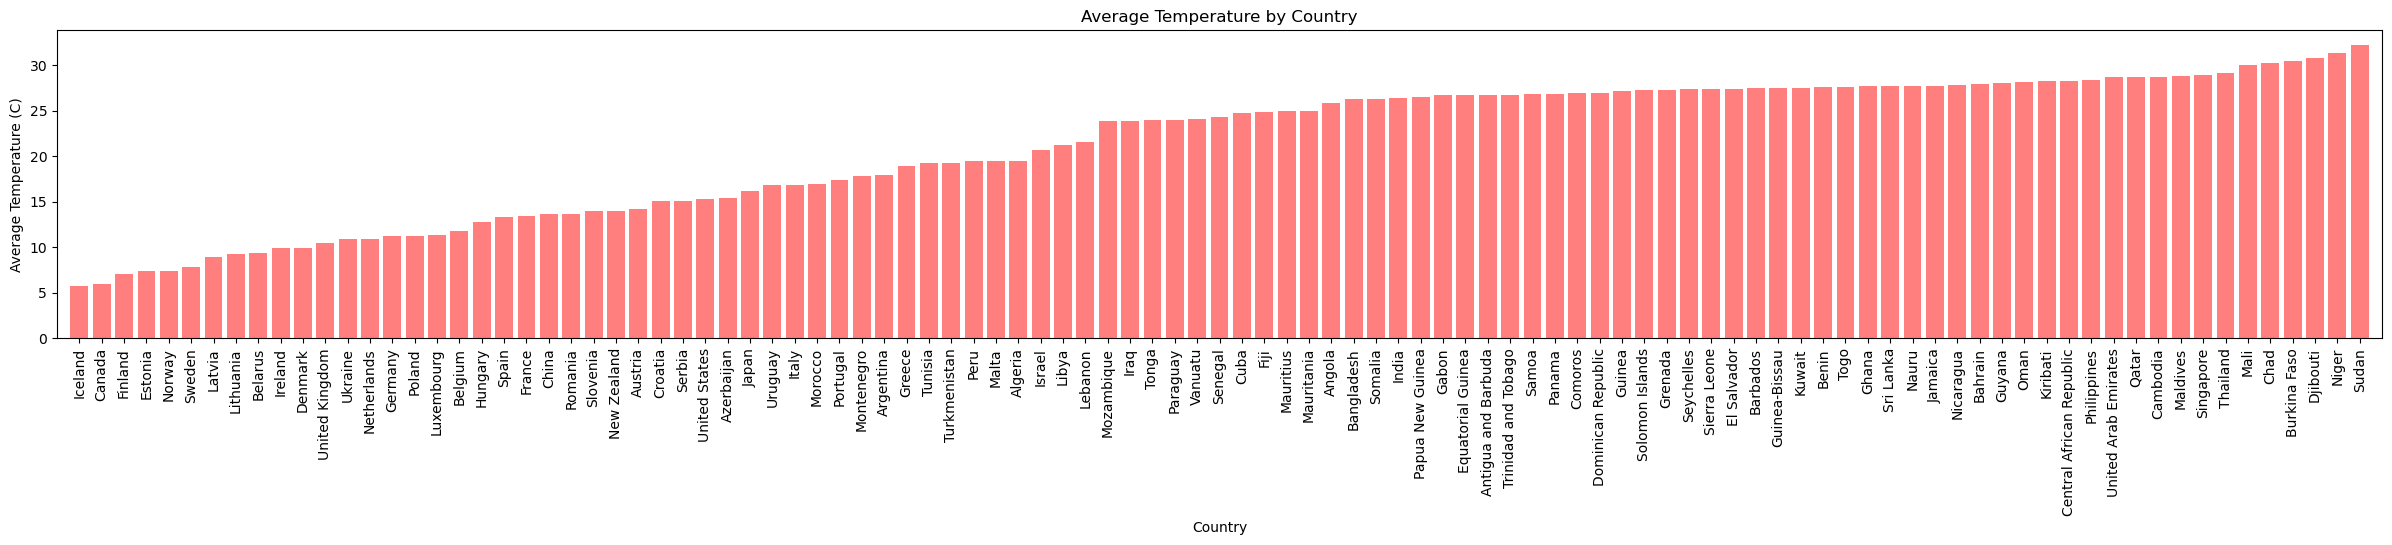

In [4]:
#graph plot showing temp values per country
country_temp = main_data.sort_values(by='Average Temp', ascending=True)

x_axis = np.arange(len(country_temp))
tick_locations = [value+0 for value in x_axis]

plt.figure(figsize=(30,4))
plt.bar(x_axis, country_temp["Average Temp"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, country_temp["Country"], rotation="vertical")
plt.ylabel('Average Temperature (C)')
plt.xlabel('Country')
plt.title('Average Temperature by Country')
plt.xlim(-1,103)

plt.savefig("output_data/Country Temp.png", bbox_inches='tight')

plt.show()

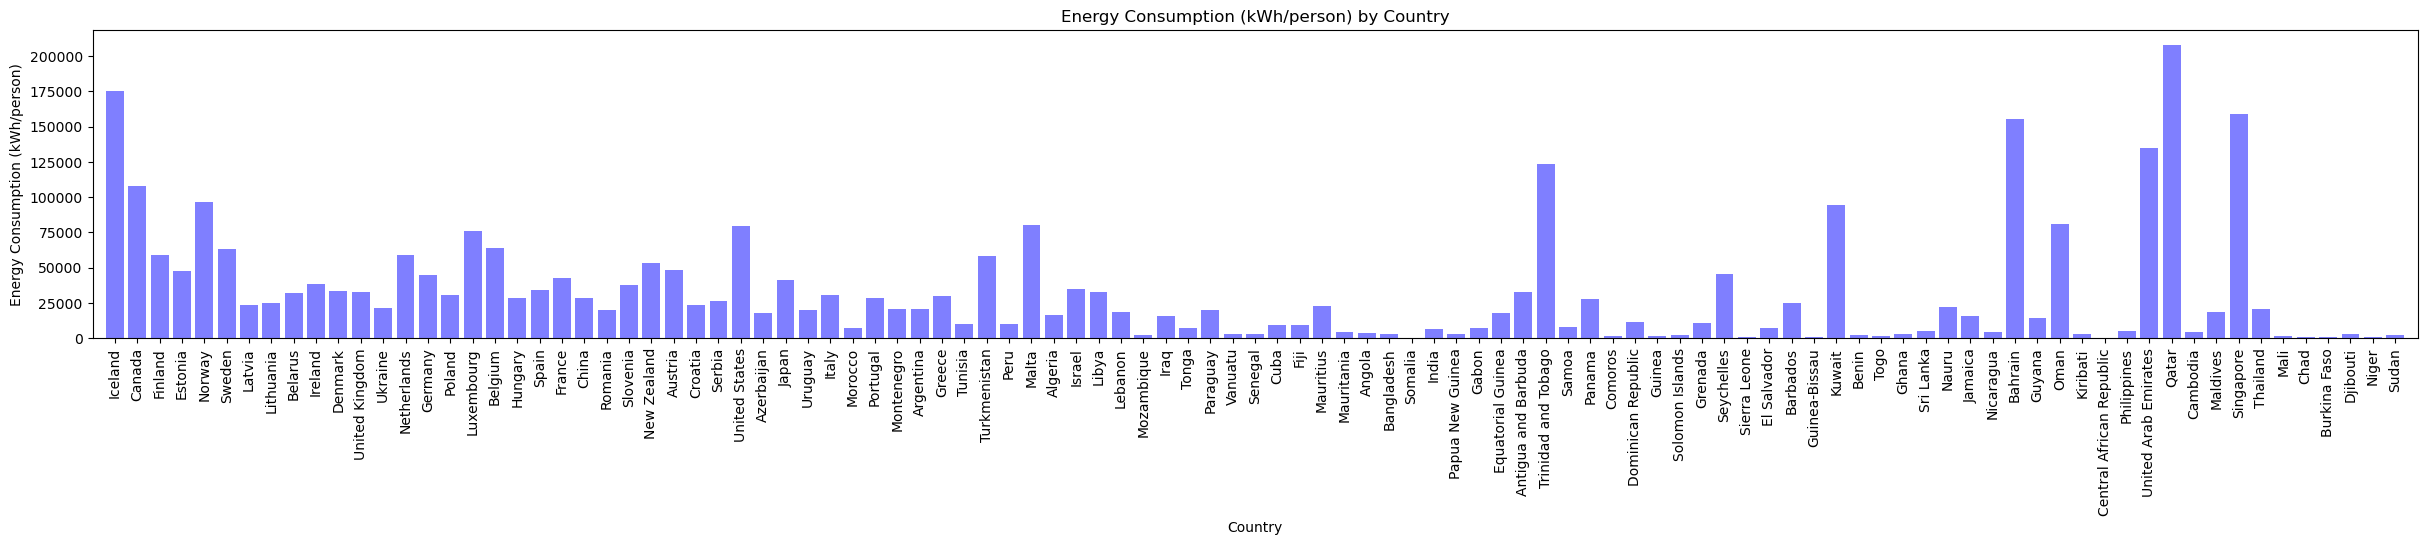

In [5]:
#graph plot showing temp values per country
country_temp = main_data.sort_values(by='Average Temp', ascending=True)

x_axis = np.arange(len(country_temp))
tick_locations = [value+0 for value in x_axis]

plt.figure(figsize=(30,4))
plt.bar(x_axis, country_temp["Primary energy consumption per capita (kWh/person)"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, country_temp["Country"], rotation="vertical")
plt.ylabel('Energy Consumption (kWh/person)')
plt.xlabel('Country')
plt.title('Energy Consumption (kWh/person) by Country')
plt.xlim(-1,103)
plt.savefig("output_data/Country Energy.png", bbox_inches='tight')

plt.show()

The r-squared is: 0.0742604311169992


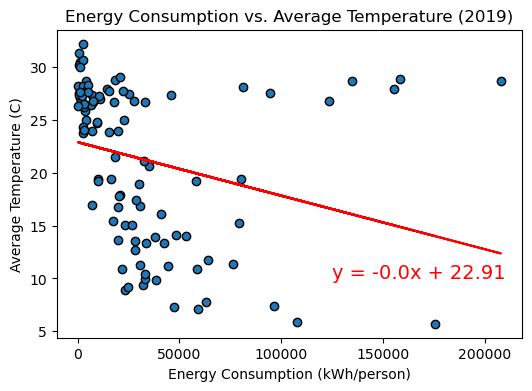

In [6]:
#scatter plot showing the correlation between temp and primary energy consumption
energy_consumption = main_data["Primary energy consumption per capita (kWh/person)"]
temperature = main_data["Average Temp"]

plt.figure(figsize=(6,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 10), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature (2019).png")

plt.show()

Analysis: The is a no/very weak correlation between energy consumption and average temperature with entire data.

In [7]:
#create two data frames (high and low temperatures)

high_temps = main_data.loc[main_data['Average Temp'] >= 25]
low_temps = main_data.loc[main_data['Average Temp'] <= 10]

The r-squared is: 0.002858322937274081


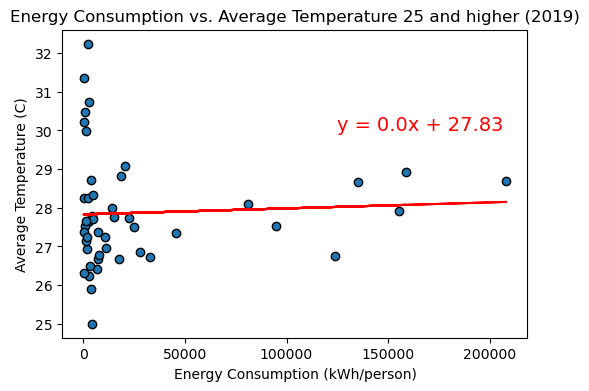

In [8]:
#scatter plot showing the correlation between temp and primary energy consumption in high temp 
energy_consumption = high_temps["Primary energy consumption per capita (kWh/person)"]
temperature = high_temps["Average Temp"]

plt.figure(figsize=(6,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature 25 and higher (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 30), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature 25 and higher (2019).png")

# Show plot
plt.show()

Analysis: There is no correlation between energy consumption and countries with average temperatures 25 and higher.

The r-squared is: 0.7053782565845196


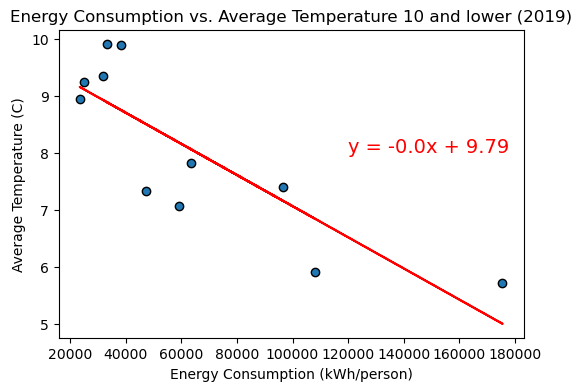

In [9]:
#scatter plot showing the correlation between temp and primary energy consumption in low temp 
energy_consumption = low_temps["Primary energy consumption per capita (kWh/person)"]
temperature = low_temps["Average Temp"]

plt.figure(figsize=(6,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature 10 and lower (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (120000, 8), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature 10 and lower (2019).png")

# Show plot
plt.show()

Analysis: There is a moderate/strong correlation between energy consumption and countries with an average temperature of 10 or lower.

In [10]:
#find outliers within the data
energyoutliers = main_data["Primary energy consumption per capita (kWh/person)"]
quartiles = energyoutliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

main_data_outliers = main_data.loc[main_data['Primary energy consumption per capita (kWh/person)'] >= 88321.71742500001]
outliers = main_data_outliers['Country'].to_list()
print(f"{outliers} could be outliers.")

The lower quartile of temperatures is: 4599.5175500000005
The upper quartile of temperatures is: 38088.3975
The interquartile range of temperatures is: 33488.87995
The the median of temperatures is: 20460.55 
Values below -45633.802375 could be outliers.
Values above 88321.71742500001 could be outliers.
['Bahrain', 'Canada', 'Iceland', 'Kuwait', 'Norway', 'Qatar', 'Singapore', 'Trinidad and Tobago', 'United Arab Emirates'] could be outliers.


The r-squared is: 0.4061675208127582


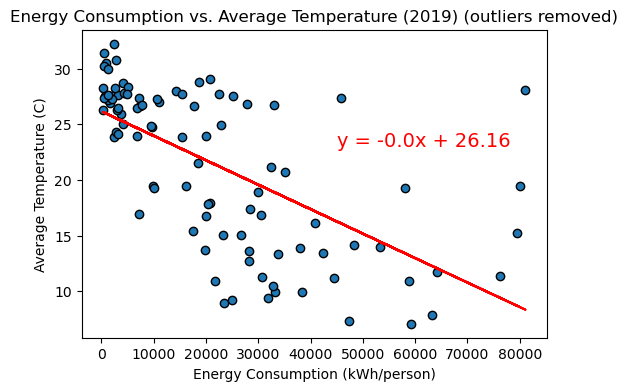

In [11]:
#remove outliers and complete new linear regression plot
main_data_no_outliers = main_data.loc[main_data['Primary energy consumption per capita (kWh/person)'] < 88321.71742500001]

energy_consumption = main_data_no_outliers["Primary energy consumption per capita (kWh/person)"]
temperature = main_data_no_outliers["Average Temp"]

plt.figure(figsize=(6,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019) (outliers removed)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (45000,23), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature (2019) - no outliers.png")

# Show plot
plt.show()

Analysis: There is a weak correlation between energy consumption and average temperature, after removing outliers.

KHADIJA

In [12]:
%%capture --no-display

# Configure the map plot
map_plot_2 = main_data.hvplot.points("Longitude","Latitude", geo = True, tiles = "OSM", frame_width=800, frame_height=400, size="Low-carbon electricity (% electricity)", scale=2, color="Country")

# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Low-carbon electricity (% electricity))

In [13]:

# Find the country with the highest temperature
country_with_highest_temp = main_data[main_data['Average Temp'] == main_data['Average Temp'].max()]

# Get the low-carbon electricity percentage for the country with the highest temperature
low_carbon_percentage_highest_temp = country_with_highest_temp['Low-carbon electricity (% electricity)'].values[0]

# Find the country with the lowest temperature
country_with_lowest_temp = main_data[main_data['Average Temp'] == main_data['Average Temp'].min()]

# Get the low-carbon electricity percentage for the country with the lowest temperature
low_carbon_percentage_lowest_temp = country_with_lowest_temp['Low-carbon electricity (% electricity)'].values[0]

# Print the results
print(f'The low carbon electricity percentage in the country with the highest temperature is {low_carbon_percentage_highest_temp:.2f}%')
print(f'The low carbon electricity percentage in the country with the lowest temperature is {low_carbon_percentage_lowest_temp:.2f}%')

The low carbon electricity percentage in the country with the highest temperature is 63.34%
The low carbon electricity percentage in the country with the lowest temperature is 100.00%


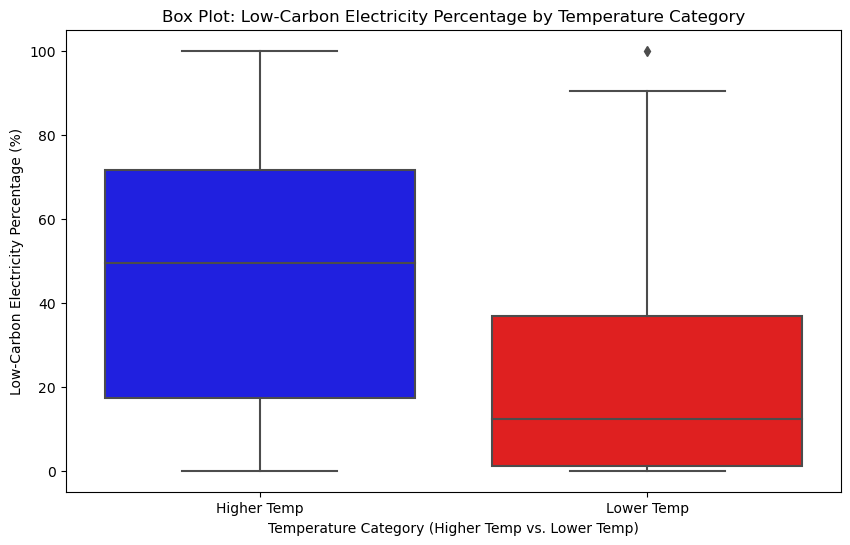

In [14]:
# Create a box plot to compare low-carbon electricity percentage by temperature category
plt.figure(figsize=(10, 6))
sns.boxplot(x=main_data['Average Temp'] > 25, y=main_data['Low-carbon electricity (% electricity)'], palette=['blue', 'red'])
plt.xlabel('Temperature Category (Higher Temp vs. Lower Temp)')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Box Plot: Low-Carbon Electricity Percentage by Temperature Category')
plt.xticks([0, 1], ['Higher Temp', 'Lower Temp'])

# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-BoxPlot.png")

plt.show()

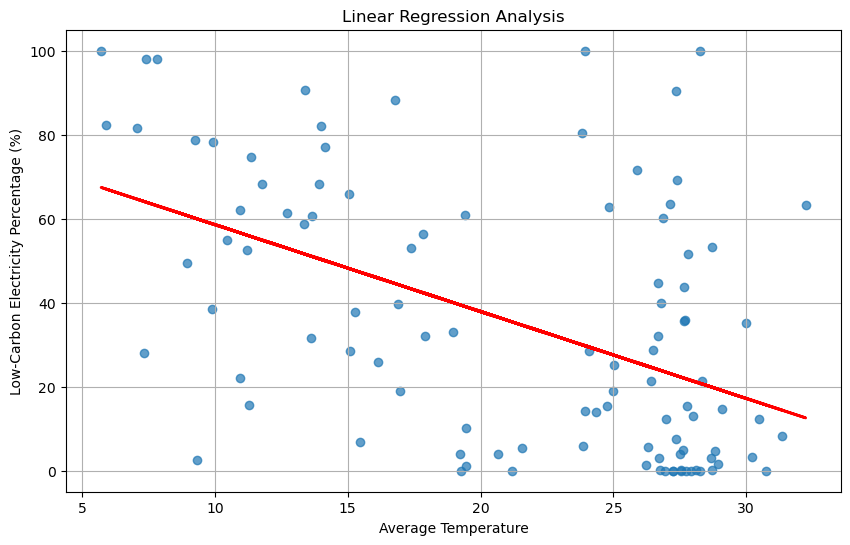

Slope (Coefficient): -2.0688
Intercept: 79.2755


In [15]:
X = main_data['Average Temp']
y = main_data['Low-carbon electricity (% electricity)']

# Calculate the coefficients (slope and intercept) using numpy's polyfit
coefficients = np.polyfit(X, y, deg=1)

# Create the regression line
regression_line = coefficients[0] * X + coefficients[1]

# Plot the main_data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X, regression_line, color='red', linewidth=2)
plt.xlabel('Average Temperature')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Linear Regression Analysis')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-linear-regression.png")

plt.show()

# Print the coefficients
slope, intercept = coefficients
print(f'Slope (Coefficient): {slope:.4f}')
print(f'Intercept: {intercept:.4f}')


Analysis :There is a negative correlation between low-carbon electricity percentage produce and average temperature in the hotest and coldest countries

we can now use more data to have a good understanding , we will choose the 10 hotest and coldest countries to do our analysis

In [16]:
# Define the 2 groupes  of 10 coldest & hotest countries 
# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)

# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)

# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
result_df.head(20)


,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,Iceland,5.72,81.07,0.00,0.00,19.12,100.00,175527.73,1640.00,64.96,-19.02,366669,142300.33
1,Canada,5.91,22.11,110.65,95.47,421.80,82.38,107980.76,580210.00,56.13,-106.35,37888705,23874.55
2,Finland,7.07,45.76,12.63,23.87,31.88,81.53,59219.42,40710.00,61.92,25.75,5529468,27098.81
3,Estonia,7.33,31.29,5.47,0.00,2.14,28.12,47295.34,10180.00,58.60,25.01,1329444,14798.71
4,Norway,7.40,62.37,2.76,0.00,131.07,97.94,96392.50,35950.00,60.47,8.47,5379839,60120.00
5,Sweden,7.81,52.88,3.35,66.13,98.94,98.01,63283.47,35000.00,60.13,18.64,10368969,33464.30
6,Latvia,8.95,41.52,3.25,0.00,3.19,49.53,23394.70,7570.00,56.88,24.60,1897052,9713.48
7,Lithuania,9.24,33.53,0.67,0.00,2.47,78.66,24873.12,11730.00,55.17,23.88,2820267,8339.96
8,Belarus,9.34,7.83,36.74,0.00,0.94,2.49,31923.44,57670.00,53.71,27.95,9633740,2499.61
9,Ireland,9.89,12.34,18.92,0.00,11.80,38.41,38270.88,35750.00,53.41,-8.24,4946119,4722.63


In [17]:
#Develop a code to analyse the relation between average temperature and  Low-carbon electricity (% electricity) production
#To get just the 3 data informations :country ,Average Temp ,Low-carbon electricity (% electricity)

# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)[['Country', 'Average Temp', 'Low-carbon electricity (% electricity)']]
lowest_temp_countries.head(5)
# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)[['Country', 'Average Temp', 'Low-carbon electricity (% electricity)']]
highest_temp_countries.head(5)
# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
result_df.head(20)

,Country,Average Temp,Low-carbon electricity (% electricity)
0,Iceland,5.72,100.00
1,Canada,5.91,82.38
2,Finland,7.07,81.53
3,Estonia,7.33,28.12
4,Norway,7.40,97.94
5,Sweden,7.81,98.01
6,Latvia,8.95,49.53
7,Lithuania,9.24,78.66
8,Belarus,9.34,2.49
9,Ireland,9.89,38.41


Analysis : the coldest country are Iceland, canada,finland and others make a very high percentage of Low carbon electricity above belarus and estonia ,irland The highest countries are Sudan ,Niger ,Djibouti and others dont produce high carbon electricity pourcentage except Sudan with 63.3% and Cambodia with 53.37% and little be for Mali with 35.24%

Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -13.9328
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 4.6044
Linear Regression for All Countries: Slope (Coefficient) = -2.07


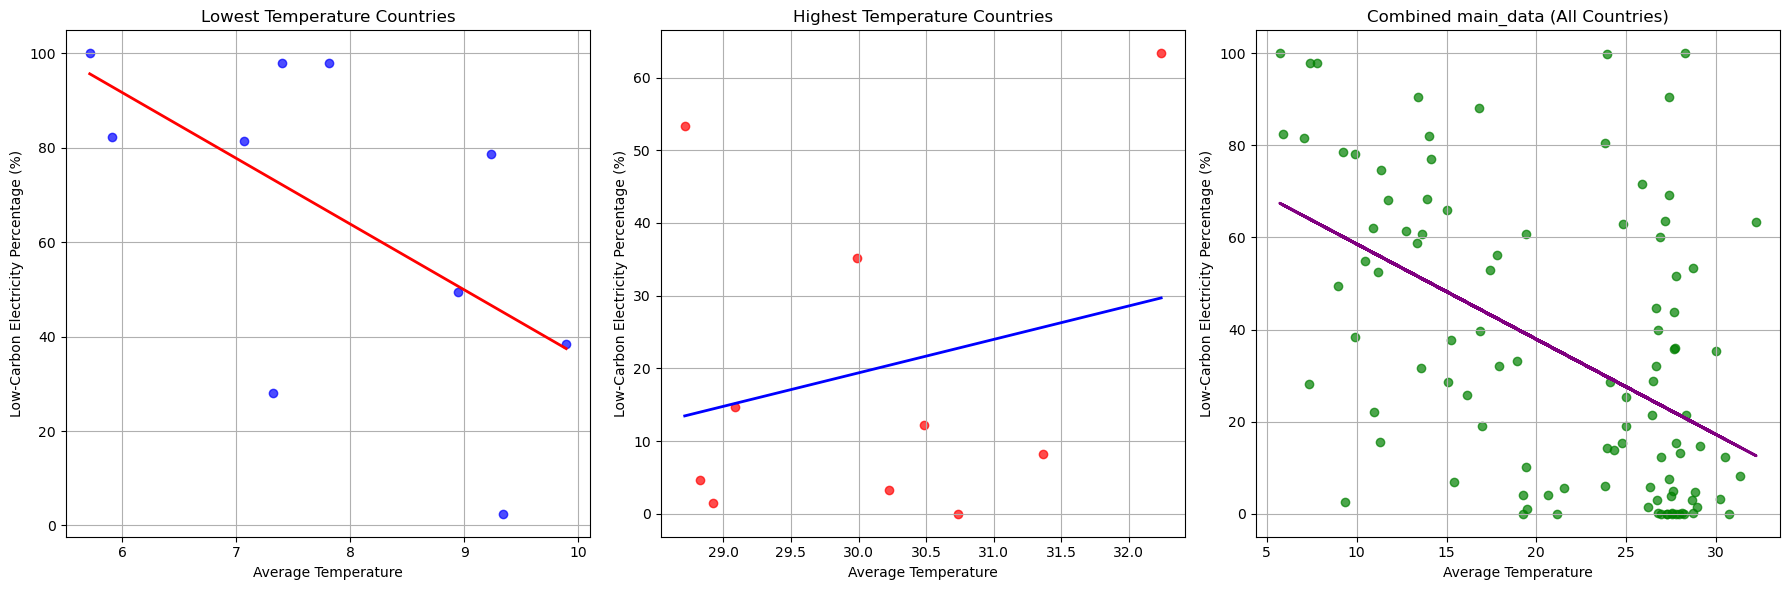

In [18]:
# Create subplots for the visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualization 1: Scatter Plot for Lowest Temperature Countries
axes[0].scatter(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], alpha=0.7, color='blue')
axes[0].set_xlabel('Average Temperature')
axes[0].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[0].set_title('Lowest Temperature Countries')
axes[0].grid(True)

# Perform Linear Regression for Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)
regression_line_low_temp = coefficients_low_temp[0] * lowest_temp_countries['Average Temp'] + coefficients_low_temp[1]
axes[0].plot(lowest_temp_countries['Average Temp'], regression_line_low_temp, color='red', linewidth=2)

# Visualization 2: Scatter Plot for Highest Temperature Countries
axes[1].scatter(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], alpha=0.7, color='red')
axes[1].set_xlabel('Average Temperature')
axes[1].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[1].set_title('Highest Temperature Countries')
axes[1].grid(True)

# Perform Linear Regression for Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)
regression_line_high_temp = coefficients_high_temp[0] * highest_temp_countries['Average Temp'] + coefficients_high_temp[1]
axes[1].plot(highest_temp_countries['Average Temp'], regression_line_high_temp, color='blue', linewidth=2)

# Visualization 3: Combined Scatter Plot for All Countries
axes[2].scatter(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], alpha=0.7, color='green')
axes[2].set_xlabel('Average Temperature')
axes[2].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[2].set_title('Combined main_data (All Countries)')
axes[2].grid(True)

# Perform Linear Regression for All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], deg=1)
regression_line_all = coefficients_all[0] * main_data['Average Temp'] + coefficients_all[1]
axes[2].plot(main_data['Average Temp'], regression_line_all, color='purple', linewidth=2)
# Save the figure
plt.savefig("output_data/Combined-Scatter-Plot-with-linear-regression-for-All-Countries.png")
# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.2f}")

# Show the plots
plt.tight_layout()
plt.show()

1-Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -13.9328 so Colder countries tend to rely more heavily on low-carbon electricity sources production but they have a higher percentage of lc production 2-Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 4.6044 so hotter countries in this group demonstrate a evolutif production of low-carbon electricity 3-Linear Regression for All Countries: Slope (Coefficient) = -2.07 so this indicate that as the average temperature increases, the percentage of low-carbon electricity decreases

Analyse :the coldest country are Iceland, canada,finland and others uses of Low carbon electricity pourcentage is very hight above belarus and estonia ,irland The highest countries are Sudan ,Niger ,Djibouti and others dont have high carbon electricity pourcentage except Sudan with 63.3% and Cambodia with 53.37% and little be for Mali with 35.24% If we have a global look at the result we can definitely see that the lowest countries produce more low carbon electricity than the highest countries except Sudan and Cambodia , so we can add more factors like a population , econmic ,geographique or others in our analysis to be more credible .

We can develop our analysis to see if they are any outliers

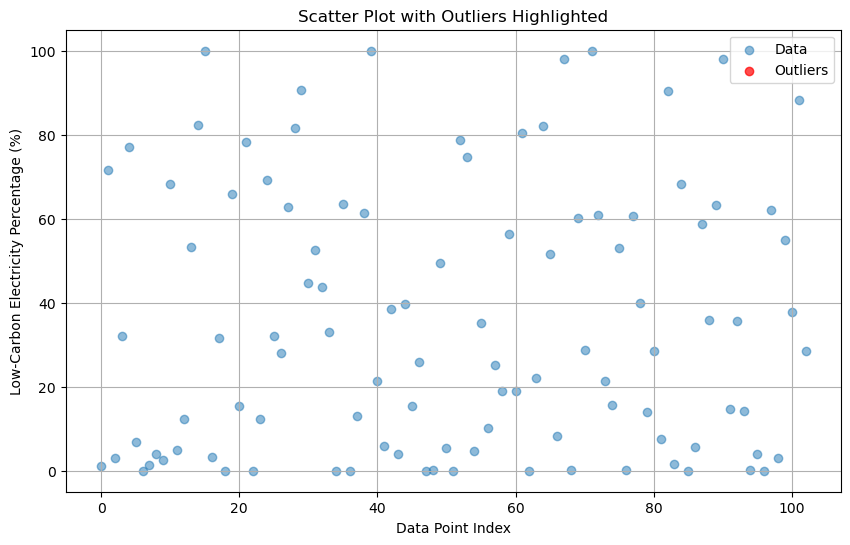

In [19]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = main_data['Low-carbon electricity (% electricity)'].quantile(0.25)
Q3 = main_data['Low-carbon electricity (% electricity)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = main_data[(main_data['Low-carbon electricity (% electricity)'] < lower_bound) | (main_data['Low-carbon electricity (% electricity)'] > upper_bound)]

# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(main_data.index, main_data['Low-carbon electricity (% electricity)'], label='Data', alpha=0.5)
plt.scatter(outliers.index, outliers['Low-carbon electricity (% electricity)'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Scatter Plot with Outliers Highlighted.png")

# Show the plot
plt.show()


Analysis : there are no outliers in this dataset , maybe we should do analysis in a big range to get more valuable result

After our first analysis about the relation between Temperature average and Low Carbon electricity % produce , we didnt have a relevant result that can help js to make some decision , so we decide to see others Factor related to Renewable energy and it impact on Temperature

In [20]:
#develop a code to analyse the relation between average temperature and  Renewable energy share in the total final energy consumption (%)
#to get just the 3 data informations :country ,Average Temp ,Renewable energy share in the total final energy consumption (%)

# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)[['Country', 'Average Temp', 'Renewable energy share in the total final energy consumption (%)']]
print (lowest_temp_countries)
# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)[['Country', 'Average Temp', 'Renewable energy share in the total final energy consumption (%)']]
print (highest_temp_countries)
# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
result_df.head(10)

      Country  Average Temp  \
39    Iceland          5.72   
14     Canada          5.91   
28    Finland          7.07   
26    Estonia          7.33   
67     Norway          7.40   
90     Sweden          7.81   
49     Latvia          8.95   
52  Lithuania          9.24   
9     Belarus          9.34   
42    Ireland          9.89   

    Renewable energy share in the total final energy consumption (%)  
39                                              81.07                 
14                                              22.11                 
28                                              45.76                 
26                                              31.29                 
67                                              62.37                 
90                                              52.88                 
49                                              41.52                 
52                                              33.53                 
9                  

,Country,Average Temp,Renewable energy share in the total final energy consumption (%)
0,Iceland,5.72,81.07
1,Canada,5.91,22.11
2,Finland,7.07,45.76
3,Estonia,7.33,31.29
4,Norway,7.40,62.37
5,Sweden,7.81,52.88
6,Latvia,8.95,41.52
7,Lithuania,9.24,33.53
8,Belarus,9.34,7.83
9,Ireland,9.89,12.34


Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -9.2526
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 15.5854
Linear Regression for All Countries: Slope (Coefficient) = 0.58


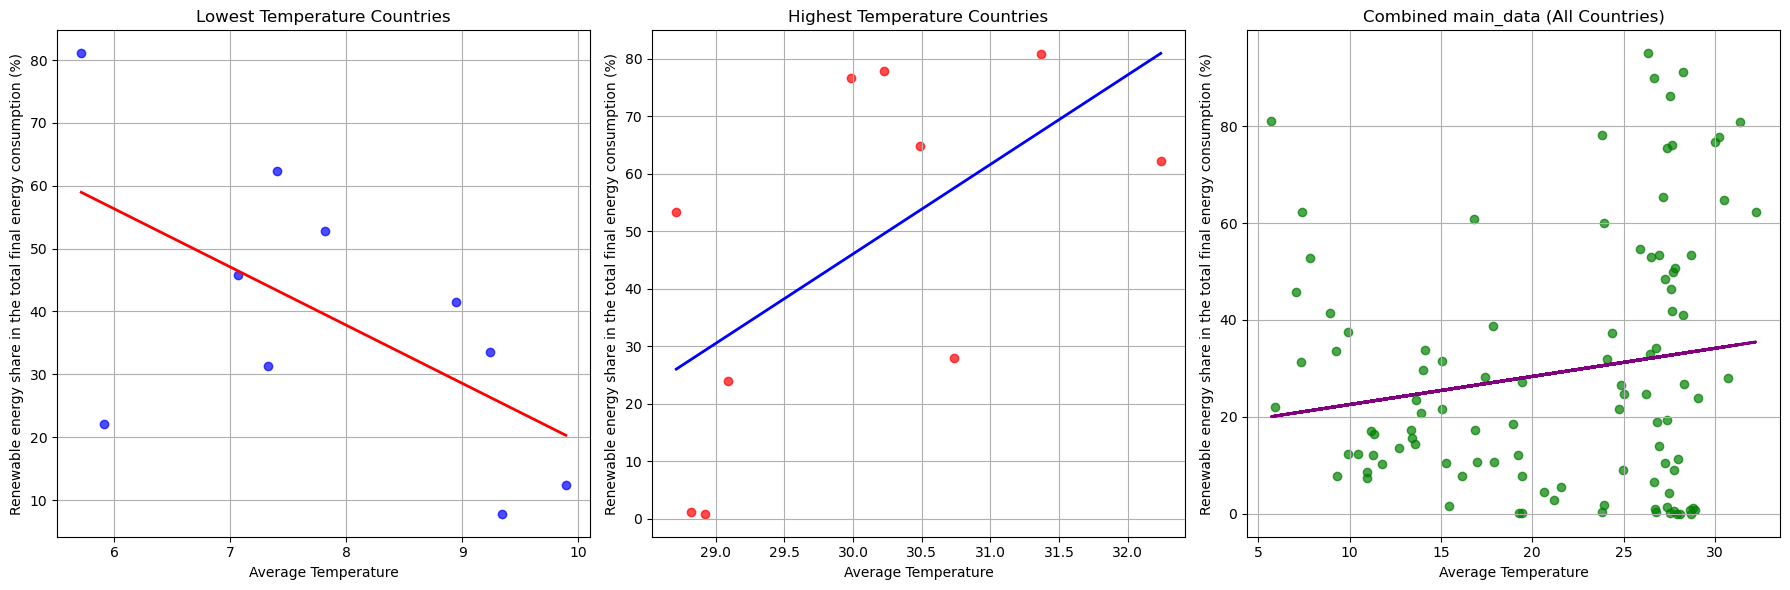

In [21]:
#Perform a code to visualize the scatter plot and linear regression about  relation between average temperature and  Renewable energy share in the total final energy consumption (%)
# Create subplots for the visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualization 1: Scatter Plot for Lowest Temperature Countries
axes[0].scatter(lowest_temp_countries['Average Temp'], lowest_temp_countries['Renewable energy share in the total final energy consumption (%)'], alpha=0.7, color='blue')
axes[0].set_xlabel('Average Temperature')
axes[0].set_ylabel('Renewable energy share in the total final energy consumption (%)')
axes[0].set_title('Lowest Temperature Countries')
axes[0].grid(True)

# Perform Linear Regression for Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Renewable energy share in the total final energy consumption (%)'], deg=1)
regression_line_low_temp = coefficients_low_temp[0] * lowest_temp_countries['Average Temp'] + coefficients_low_temp[1]
axes[0].plot(lowest_temp_countries['Average Temp'], regression_line_low_temp, color='red', linewidth=2)
# Save the figure
plt.savefig("output_data/Scatter-Plot-with-linear-regression-for-Renewable -in -Lowest-Temperature-Countries.png")
# Visualization 2: Scatter Plot for Highest Temperature Countries
axes[1].scatter(highest_temp_countries['Average Temp'], highest_temp_countries['Renewable energy share in the total final energy consumption (%)'], alpha=0.7, color='red')
axes[1].set_xlabel('Average Temperature')
axes[1].set_ylabel('Renewable energy share in the total final energy consumption (%)')
axes[1].set_title('Highest Temperature Countries')
axes[1].grid(True)

# Perform Linear Regression for Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Renewable energy share in the total final energy consumption (%)'], deg=1)
regression_line_high_temp = coefficients_high_temp[0] * highest_temp_countries['Average Temp'] + coefficients_high_temp[1]
axes[1].plot(highest_temp_countries['Average Temp'], regression_line_high_temp, color='blue', linewidth=2)
# Save the figure
plt.savefig("output_data/Scatter-Plot-with-linear-regression-for-Renewable -in -highest-Temperature-Countries.png")
# Visualization 3: Combined Scatter Plot for All Countries
axes[2].scatter(main_data['Average Temp'], main_data['Renewable energy share in the total final energy consumption (%)'], alpha=0.7, color='green')
axes[2].set_xlabel('Average Temperature')
axes[2].set_ylabel('Renewable energy share in the total final energy consumption (%)')
axes[2].set_title('Combined main_data (All Countries)')
axes[2].grid(True)

# Perform Linear Regression for All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Renewable energy share in the total final energy consumption (%)'], deg=1)
regression_line_all = coefficients_all[0] * main_data['Average Temp'] + coefficients_all[1]
axes[2].plot(main_data['Average Temp'], regression_line_all, color='purple', linewidth=2)
# Save the figure
plt.savefig("output_data/Combined-Scatter-Plot-with-linear-regression-for-Renewable -in -All-Countries.png")
# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.2f}")

# Show the plots
plt.tight_layout()
plt.show()

Analysis : we have a negative coefficient -9.25 so the coldest countries tend to rely more heavily on renewables energy pourcentage  or the highest countries with a strong correlation coefficient 15,58 tend to use more renewable energy source .the percentage of renewable energy used have a positif regression with the average temperature on global countries

Yosieph

In [22]:
# Set x axis and tick locations
x_axis = np.arange(len(main_data))
tick_locations = [value for value in x_axis]

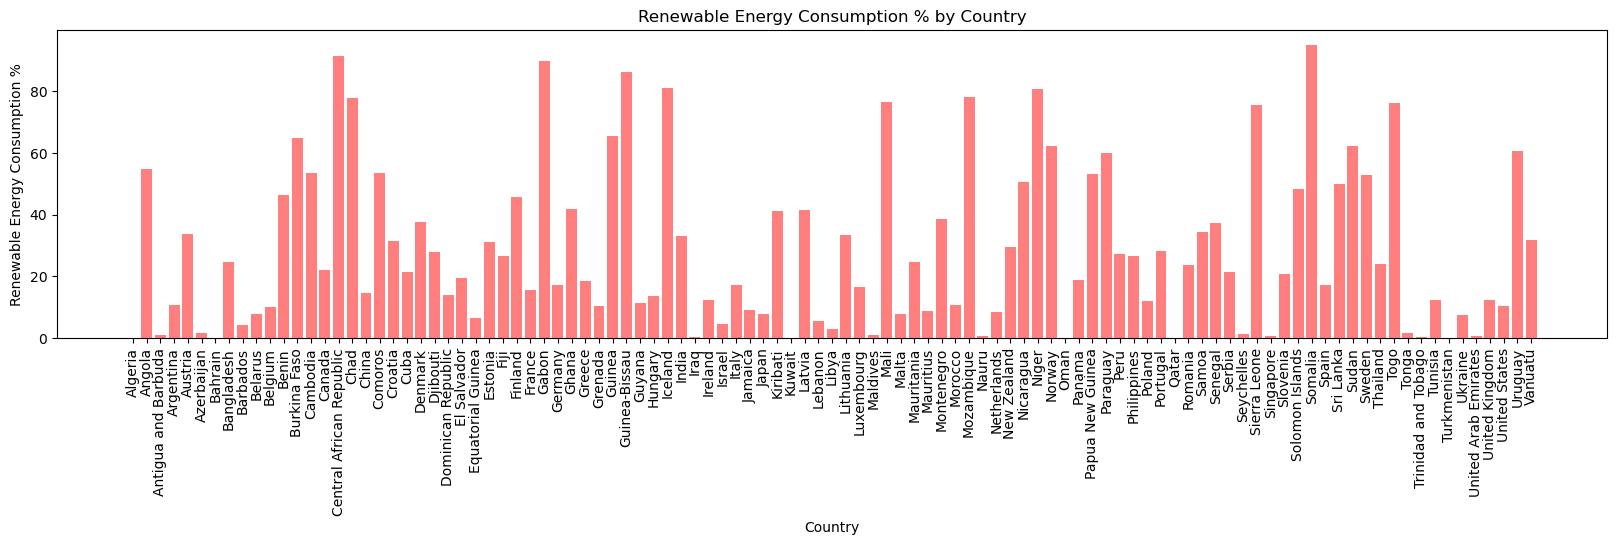

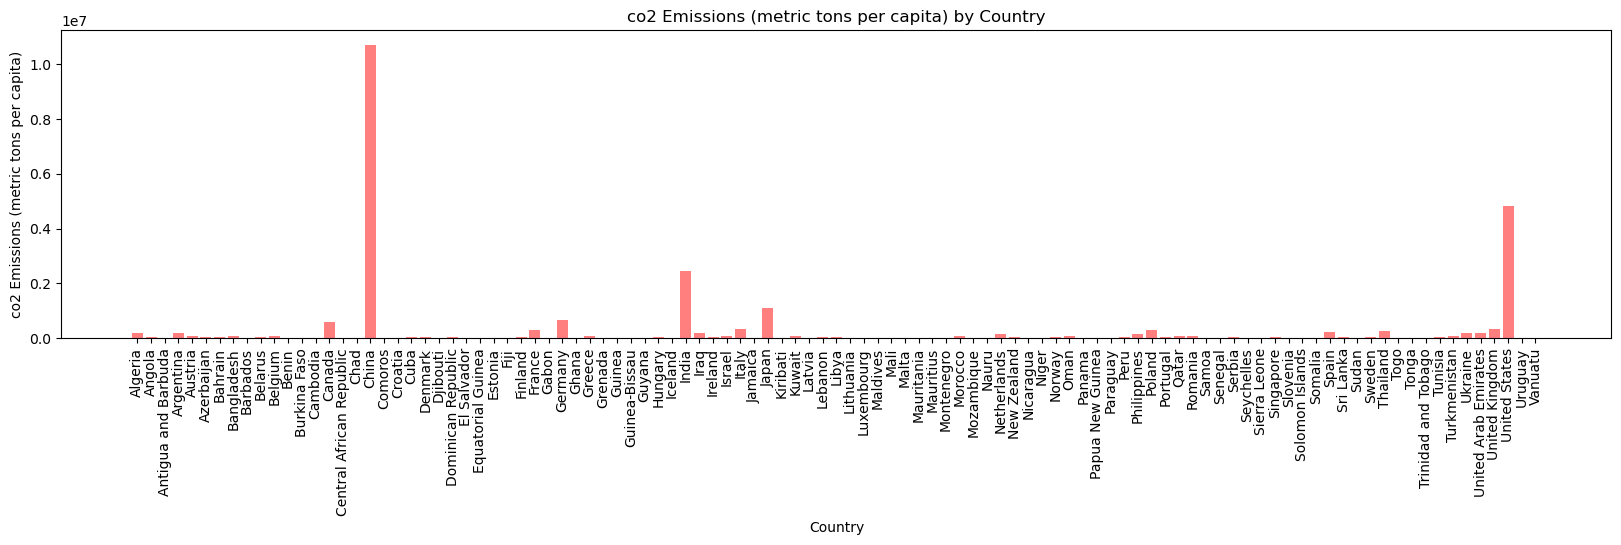

In [23]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, main_data["Renewable energy share in the total final energy consumption (%)"], color='r', alpha=0.5, align="center" )
plt.xticks(tick_locations, main_data["Country"], rotation="vertical")
plt.ylabel('Renewable Energy Consumption %')
plt.xlabel('Country')
plt.title('Renewable Energy Consumption % by Country')

plt.savefig("output_data/bar graph - renewable.png", bbox_inches='tight')

plt.figure(figsize=(20,4))
plt.bar(x_axis, main_data["co2 Emissions (metric tons per capita)"], color='r', alpha=0.5, align="center" )
plt.xticks(tick_locations, main_data["Country"], rotation="vertical")
plt.ylabel('co2 Emissions (metric tons per capita)')
plt.xlabel('Country')
plt.title('co2 Emissions (metric tons per capita) by Country')

# Save the figure
plt.savefig("output_data/bar graph - co2 emissions.png", bbox_inches='tight')


plt.show()


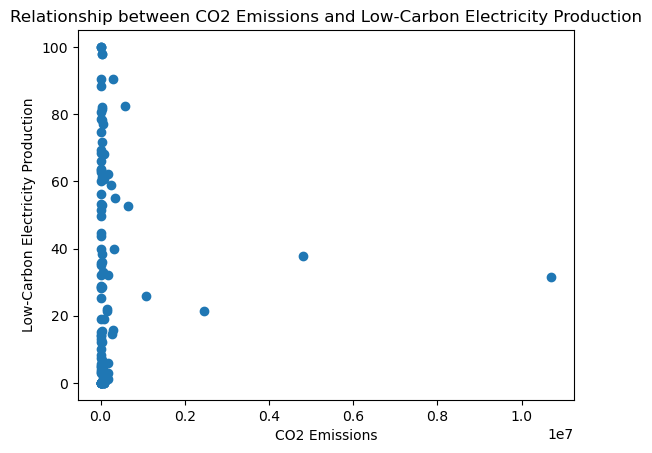

In [24]:
# Create a scatter plot
plt.scatter(main_data['co2 Emissions (metric tons per capita)'], main_data['Low-carbon electricity (% electricity)'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Low-Carbon Electricity Production')
plt.title('Relationship between CO2 Emissions and Low-Carbon Electricity Production')

plt.savefig("output_data/scatter plot - co2 and lowcar.png", bbox_inches='tight')

plt.show()

In [25]:
# data informations :country ,Low-carbon electricity (% electricity) ,co2 Emissions (metric tons per capita)
# Sort the main_data by 'Average Temp' in ascending order to get the lowest Carbon electricity countries
lowest_co2_emission_countries = main_data.sort_values(by='Renewable energy share in the total final energy consumption (%)', ascending=True).head(10)[['Country','co2 Emissions (metric tons per capita)' ,'Renewable energy share in the total final energy consumption (%)']]
print (lowest_co2_emission_countries)


                 Country  co2 Emissions (metric tons per capita)  \
6                Bahrain                                33260.00   
68                  Oman                                76030.00   
76                 Qatar                                91970.00   
96          Turkmenistan                                72870.00   
48                Kuwait                                92650.00   
0                Algeria                               171250.00   
94   Trinidad and Tobago                                17190.00   
41                  Iraq                               174560.00   
62                 Nauru                                   60.00   
98  United Arab Emirates                               188860.00   

    Renewable energy share in the total final energy consumption (%)  
6                                                0.00                 
68                                               0.00                 
76                                    

Analysis:The Low-co2 emission  country are Bahrian , Oman , Qatar ,Turkmenistan , Kuwait ,Algeria , Trinidad and Tobago  , Iraq , Nauru  ....ect  . BUt they didn't use renawal energy .
May be it will be depend on population and industrail economy factor    

In [26]:
# List the main_data by co2 emission  in descending order to get the co2 emssion countries
highest_Co2_Emission_countries = main_data.sort_values(by='co2 Emissions (metric tons per capita)', ascending=False).head(10)[['Country', 'co2 Emissions (metric tons per capita)', 'Renewable energy share in the total final energy consumption (%)']]
print (highest_Co2_Emission_countries)


            Country  co2 Emissions (metric tons per capita)  \
17            China                             10707220.00   
100   United States                              4817720.00   
40            India                              2456300.00   
46            Japan                              1081570.00   
31          Germany                               657400.00   
14           Canada                               580210.00   
99   United Kingdom                               348920.00   
44            Italy                               317240.00   
29           France                               300520.00   
74           Poland                               295130.00   

     Renewable energy share in the total final energy consumption (%)  
17                                               14.45                 
100                                              10.42                 
40                                               32.93                 
46                

Analysis:The High co2 emission  country  are China ,United States , india , Japan and Germany ..ect. Industrial economy major factor in co2 emission and popilation alos one factor . 


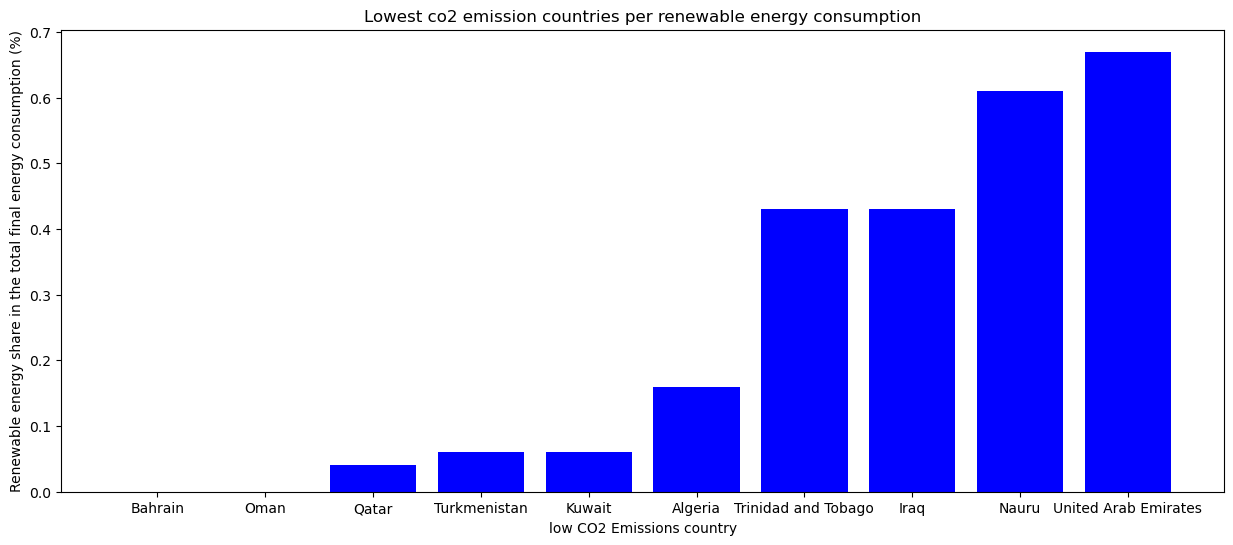

In [27]:
x=lowest_co2_emission_countries[('Country')]
y=lowest_co2_emission_countries[('Renewable energy share in the total final energy consumption (%)')]
plt.figure(figsize=(15,6))
plt.bar(x,y ,color=['blue'])
plt.xlabel('low CO2 Emissions country')
plt.ylabel('Renewable energy share in the total final energy consumption (%)')
plt.title('Lowest co2 emission countries per renewable energy consumption')
plt.show()

The resulting plot will show a bar chart with each country's name on the x-axis and the corresponding CO2 emissions per capita (expressed as "low-carbon electricity (% electricity)") on the y-axis. 
Each bar will represent a country, and its height will indicate the value of CO2 emissions per capita. 
The blue color is used to distinguish the bars.

This chart should help visualize and compare the low CO2 emission countries in terms of their CO2 emissions per capita, 
allowing for easy identification of which countries have lower emissions in relation to their electricity production.

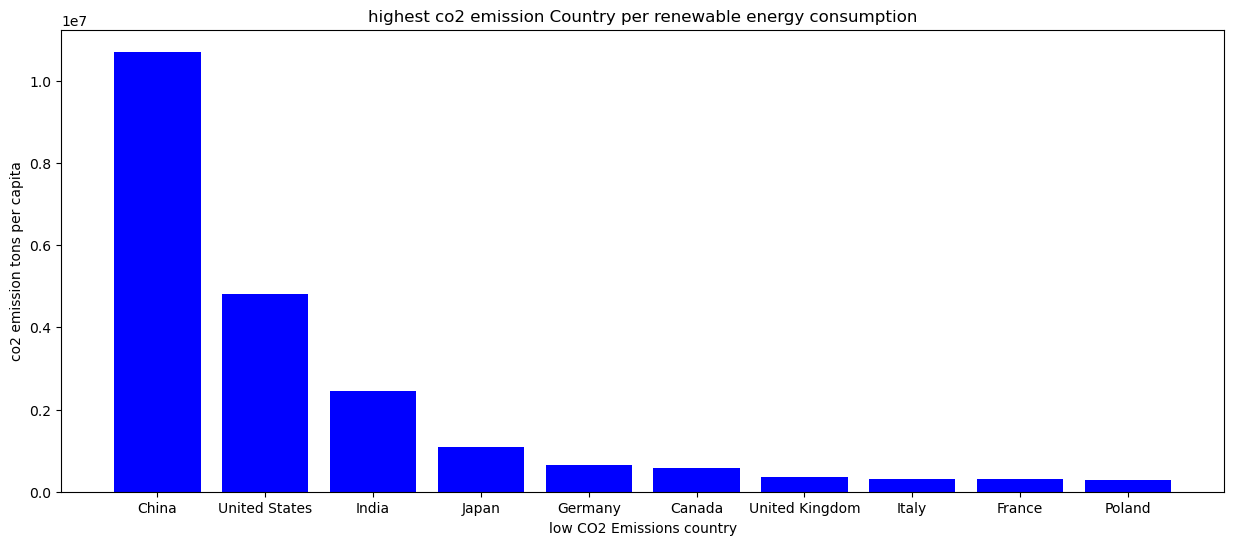

In [28]:
x=highest_Co2_Emission_countries[('Country')]
y=highest_Co2_Emission_countries[('co2 Emissions (metric tons per capita)')]
plt.figure(figsize=(15,6))
plt.bar(x,y ,color=['blue'])
plt.xlabel('low CO2 Emissions country')
plt.ylabel('co2 emission tons per capita')
plt.title('highest co2 emission Country per renewable energy consumption')


plt.savefig("output_data/bar graph - highest.png", bbox_inches='tight')

plt.show()

The resulting plot will show a bar chart with each country's name on the x-axis and the corresponding CO2 emissions per capita on the y-axis.
 Each bar will represent a country, and its height will indicate the value of CO2 emissions per capita. 
The blue color is used to distinguish the bars.

This chart should help visualize and compare the countries with the highest CO2 emissions in terms of their CO2 emissions per capita, allowing for easy identification of which countries have the highest emissions relative to their population.

If the average low-carbon electricity percentage is higher for countries with "Low CO2 Emissions," it would suggest that these countries tend to use more low-carbon electricity sources.

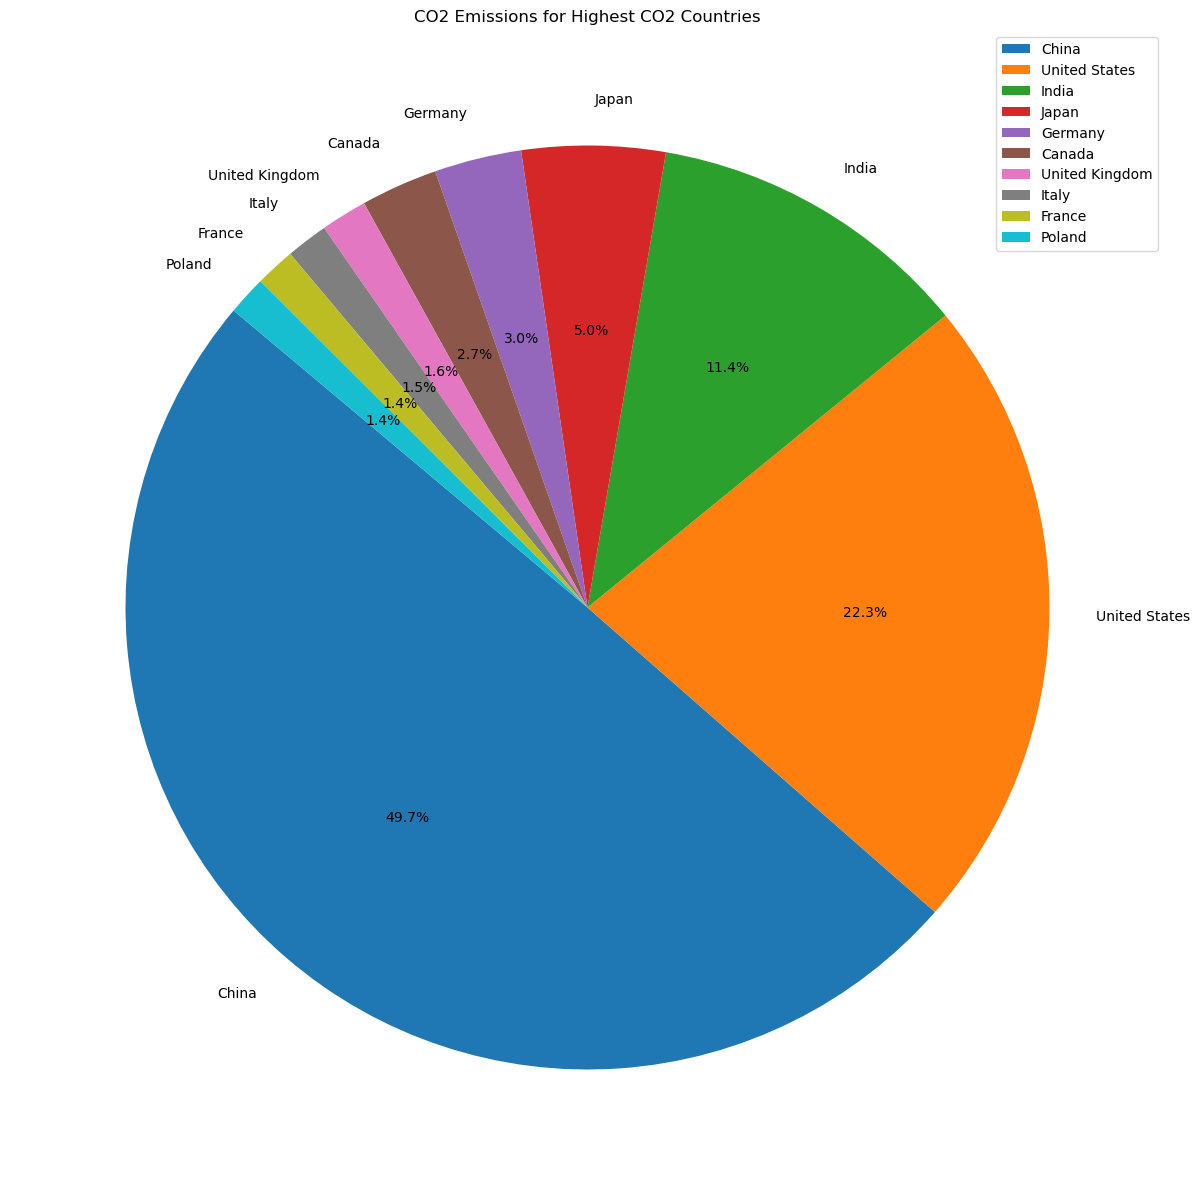

In [29]:
#list of high carbon 
x= highest_Co2_Emission_countries[('co2 Emissions (metric tons per capita)')]
mylable=highest_Co2_Emission_countries[('Country')]
fig=plt.figure(figsize =(25,15))
plt.pie(x ,labels=mylable, autopct='%1.1f%%' , startangle = 140)
plt.title('CO2 Emissions for Highest CO2 Countries')

plt.savefig("output_data/pichart - highest.png", bbox_inches='tight')

plt.legend()

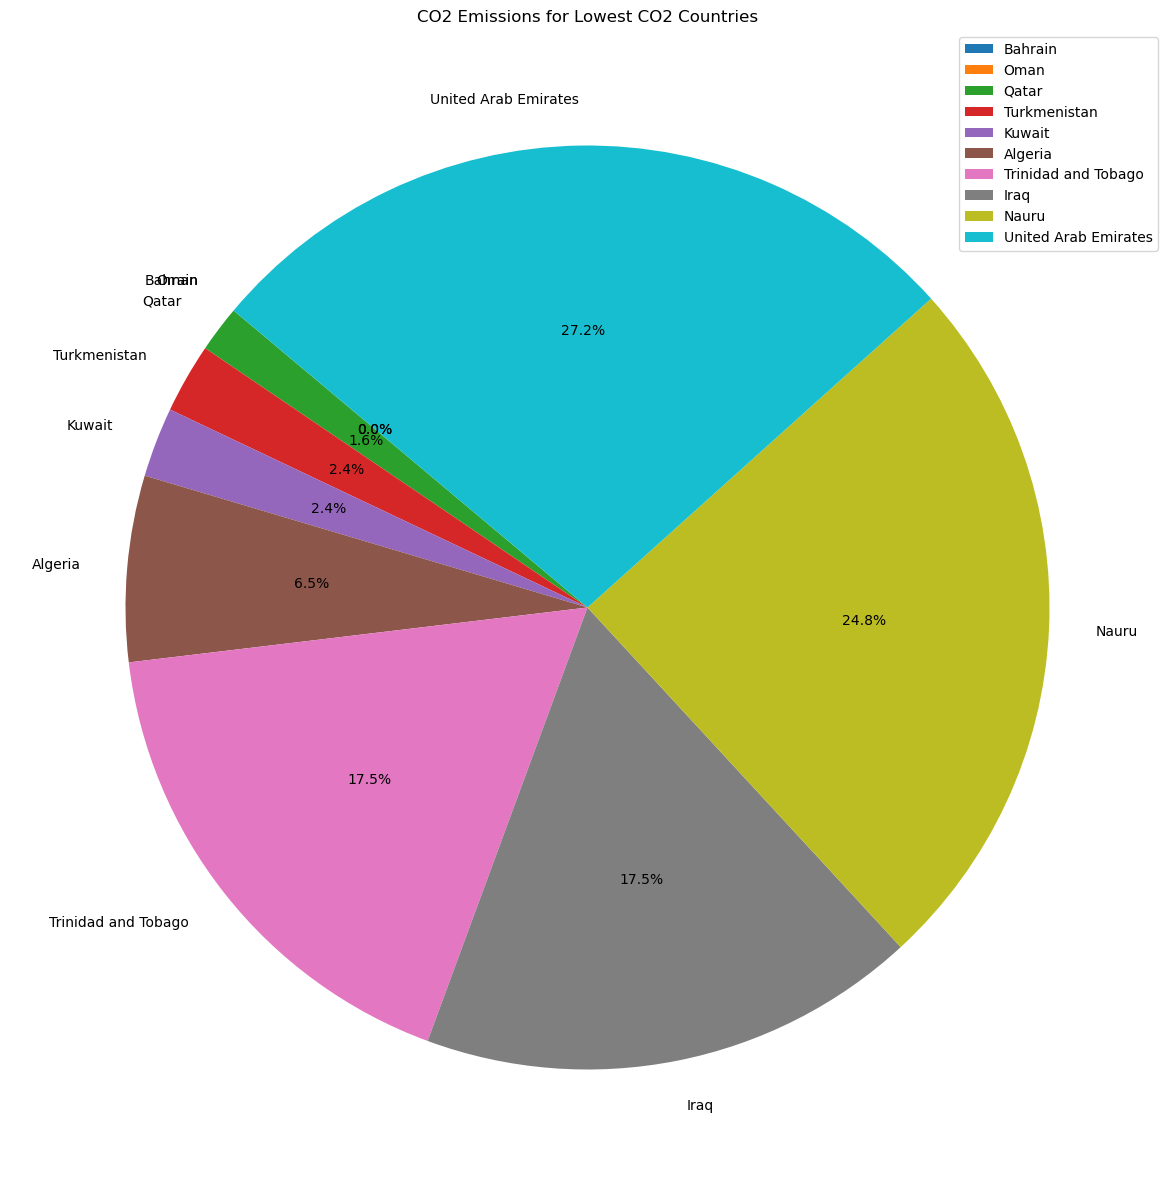

In [30]:
x= lowest_co2_emission_countries[('Renewable energy share in the total final energy consumption (%)')]
mylable=lowest_co2_emission_countries[('Country')]
fig=plt.figure(figsize =(25,15))
plt.pie(x ,labels=mylable, autopct='%1.1f%%' , startangle = 140)
plt.title('CO2 Emissions for Lowest CO2 Countries')

plt.savefig("output_data/pichart - lowest.png", bbox_inches='tight')
plt.legend()

These trends suggest a correlation between low CO2 emissions and higher use of low-carbon electricity, it's essential to remember that each country's energy mix and emissions profile are influenced by unique factors, including geography, natural resources, economic conditions, and government policies.

In [31]:
correlation_coefficient = main_data['co2 Emissions (metric tons per capita)'].corr(main_data['Low-carbon electricity (% electricity)'])
# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

Correlation Coefficient: -0.01


A correlation coefficient of -0.01 means that changes in CO2 emissions per capita are not strongly related to changes in the percentage of low-carbon electricity.

Text(0.5, 1.0, 'Relationship between CO2 Emissions and Low-Carbon Electricity Use')

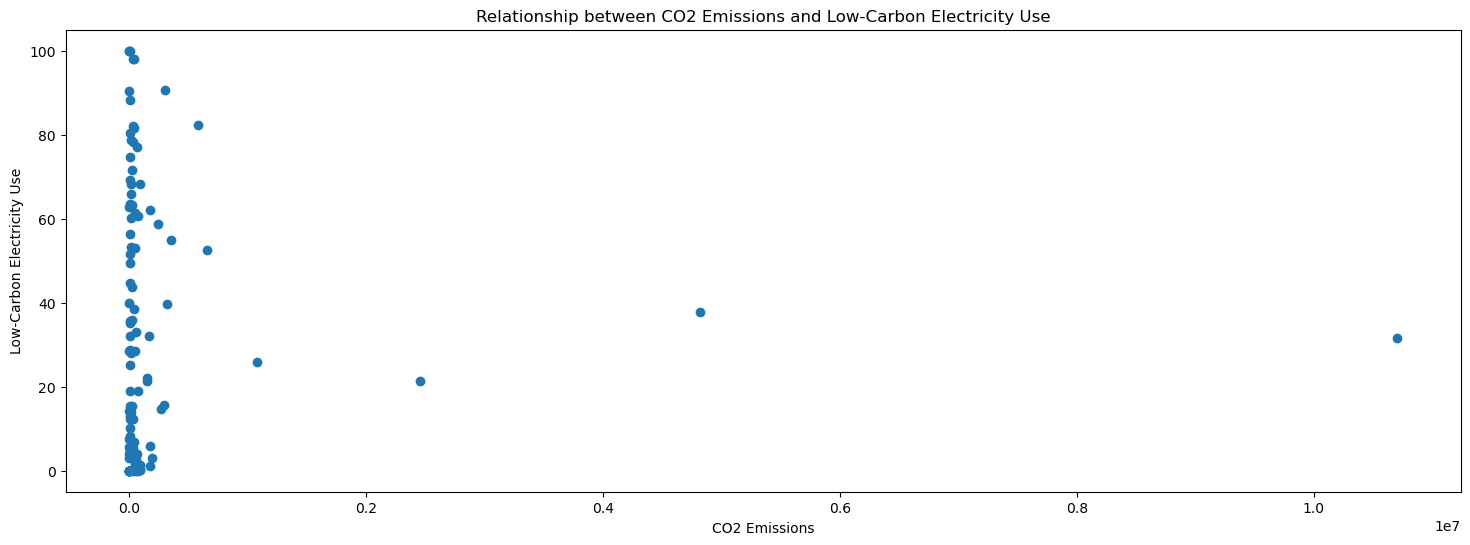

In [32]:
# Create subplots for the visualizations
fig, axes = plt.subplots(1, figsize=(18, 6))

# Create a scatter plot
plt.scatter(main_data['co2 Emissions (metric tons per capita)'], main_data['Low-carbon electricity (% electricity)'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Low-Carbon Electricity Use')
plt.title('Relationship between CO2 Emissions and Low-Carbon Electricity Use')

A correlation coefficient of -0.01 indicates a very weak or practically negligible negative correlation between the two variables, CO2 emissions per capita and co2 emission

In [33]:
correlation_coefficient = main_data['co2 Emissions (metric tons per capita)'].corr(main_data['Electricity from renewables (TWh)'])
# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

Correlation Coefficient: 0.98


A correlation coefficient of 0.98 indicates a very strong and positive linear relationship between CO2 emissions and electricity generated from renewable sources. A value of 0.98 suggests that as one variable (in this case, electricity from renewable sources) increases, the other variable (CO2 emissions) tends to increase proportionally. This is a strong indication that the adoption of renewable energy sources is associated with lower CO2 emissions, which is a positive outcome for environmental sustainability and combating climate change.

Text(0.5, 1.0, 'Relationship between CO2 Emissions and Electricity from renewables (TWh)')

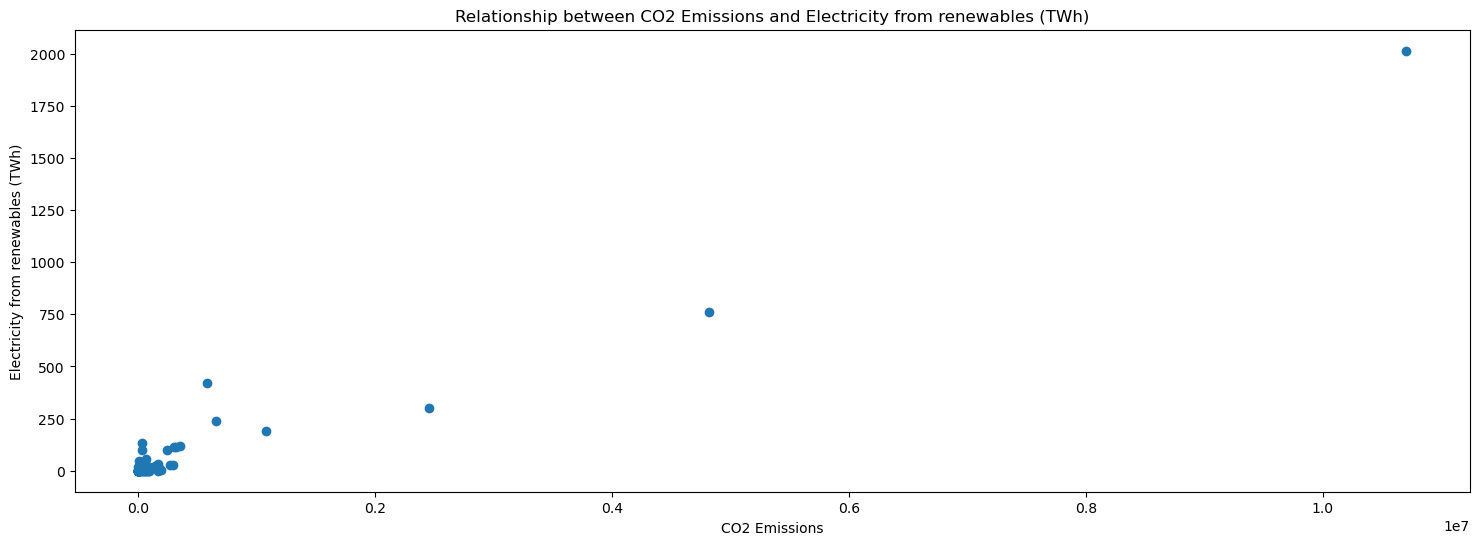

In [34]:
# Create subplots for the visualizations
fig, axes = plt.subplots(1, figsize=(18, 6))

# Create a scatter plot
plt.scatter(main_data['co2 Emissions (metric tons per capita)'], main_data['Electricity from renewables (TWh)'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Electricity from renewables (TWh)')
plt.title('Relationship between CO2 Emissions and Electricity from renewables (TWh)')

A correlation coefficient of 0.98 indicates a very strong and positive linear relationship between CO2 emissions and electricity generated from renewable sources. A value of 0.98 suggests that as one variable (in this case, electricity from renewable sources) increases, the other variable (CO2 emissions) tends to increase proportionally. This is a strong indication that the adoption of renewable energy sources is associated with lower CO2 emissions, which is a positive outcome for environmental sustainability and combating climate change.